# Evaluate the 527 production conversations  for response's quality, task complete

It's similar to the exercise we went through manually

More details are in conversation_evaluator.py


In [1]:
import json

import pandas as pd
from pandas import json_normalize


def load_and_normalize_results(json_file_path, json_col):
    # Read the JSON file
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    
    # Convert to DataFrame and normalize the 'evals' column
    df = pd.DataFrame(data)
    evals_normalized = json_normalize(
        df[json_col].tolist(),
        sep='_'
    )
    
    # Combine with original DataFrame
    result_df = pd.concat([df.drop(json_col, axis=1),evals_normalized], axis=1)
    
    return result_df

df = load_and_normalize_results('results/evaluation_results_20250315_204832.json', 'evals')
df

,session_id,evaluation_time,conversation,response_quality_score,response_quality_label,task_completion_score,task_completion_label,format_adherence_score,format_adherence_label
0,67adf88248b21bcadffdc29e,2025-03-15T20:01:58.184721,user: anger management \nassistant: Thank you ...,1.0,good,1.0,complete,1.0,proper
1,67ade93348b21bcadffdc223,2025-03-15T20:02:02.816766,user: Im looking for couples counseling\nassis...,1.0,good,1.0,complete,0.0,improper
2,67adaceb48b21bcadffdc170,2025-03-15T20:02:07.337538,user: I want help with feeling better\nassista...,1.0,good,0.0,incomplete,1.0,proper
3,67ad8edc48b21bcadffdc10f,2025-03-15T20:02:11.897482,user: I've been struggling with depression for...,1.0,good,1.0,complete,1.0,proper
4,67b4ca413b62b7284923fa0c,2025-03-15T20:02:16.435464,user: I want help with family issues\nassistan...,1.0,good,1.0,complete,1.0,proper
...,...,...,...,...,...,...,...,...,...
522,67b4d2ca3b62b7284923fa9e,2025-03-15T20:48:09.105579,"user: I've been feeling overwhelmed, down, not...",0.0,bad,0.0,incomplete,0.0,improper
523,67b4dd7f3b62b7284923fbd9,2025-03-15T20:48:13.552705,user: A few weeks ago\nassistant: I'm sorry to...,0.0,bad,0.0,incomplete,0.0,improper
524,67b4ce833b62b7284923fa60,2025-03-15T20:48:18.365312,user: I'm looking to find a counselor as well ...,1.0,good,1.0,complete,1.0,proper
525,67b4d3df3b62b7284923fabd,2025-03-15T20:48:23.051962,user: I’ve been struggling with binge eating.\...,1.0,good,1.0,complete,1.0,proper


In [2]:
pd.set_option('display.max_colwidth', None) # Show full content of each cell
df

session_id             evaluation_time  \
0    67adf88248b21bcadffdc29e  2025-03-15T20:01:58.184721   
1    67ade93348b21bcadffdc223  2025-03-15T20:02:02.816766   
2    67adaceb48b21bcadffdc170  2025-03-15T20:02:07.337538   
3    67ad8edc48b21bcadffdc10f  2025-03-15T20:02:11.897482   
4    67b4ca413b62b7284923fa0c  2025-03-15T20:02:16.435464   
..                        ...                         ...   
522  67b4d2ca3b62b7284923fa9e  2025-03-15T20:48:09.105579   
523  67b4dd7f3b62b7284923fbd9  2025-03-15T20:48:13.552705   
524  67b4ce833b62b7284923fa60  2025-03-15T20:48:18.365312   
525  67b4d3df3b62b7284923fabd  2025-03-15T20:48:23.051962   
526  67b4c6eb3b62b7284923f980  2025-03-15T20:48:27.960121   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [6]:
df.describe()

,response_quality_score,task_completion_score,format_adherence_score
count,527.000000,527.000000,527.000000
mean,0.740038,0.455408,0.821632
std,0.439030,0.498481,0.383186
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'response_quality_score'}>,
        <Axes: title={'center': 'task_completion_score'}>],
       [<Axes: title={'center': 'format_adherence_score'}>, <Axes: >]],
      dtype=object)

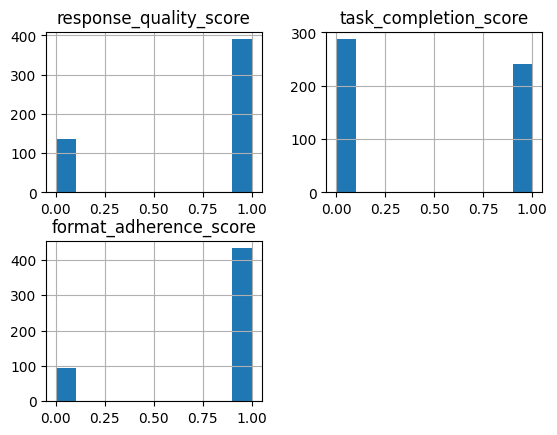

In [14]:
df.hist()

In [15]:
df[df.task_completion_score == 0]

,session_id,evaluation_time,conversation,response_quality_score,response_quality_label,task_completion_score,task_completion_label,format_adherence_score,format_adherence_label
2,67adaceb48b21bcadffdc170,2025-03-15T20:02:07.337538,"user: I want help with feeling better\nassistant: I'm really glad you reached out. It's okay to feel this way, and I'm here to help. Can you tell me a bit more about what you're experiencing and what you're hoping to achieve?\nuser: I have fibromyalgia. It brings depression with it and a feeling of uselessness.\n\nI lost my Mother [NUMBER] years ago and I still struggle with the lose. We were extremely close.\n\nI have HORRIBLE anxiety. I have been diagnosed with Bipolar.\n\nI am at [LOCATION] now and nothing is changing. \n\nI am looking for a doctor that can help gets my meds where they need to be. I shut down to my children and my fiancée and my immediate family. I shut dowm to myself. I am tired and need help. I want to live again. I want to have the energy and DESIRE to live again!!\nassistant: I'm really sorry you're going through this. It sounds like you're dealing with a lot right now, and it's completely understandable to feel overwhelmed. I'm here to help you find the support you need. Are you interested in starting therapy with SonderMind to help you manage these feelings and work on your mental health?",1.0,good,0.0,incomplete,1.0,proper
7,67ad3f9048b21bcadffdbb96,2025-03-15T20:02:30.918392,"user: I'm looking for a therapist\nassistant: I'm glad you're reaching out for support. Can you tell me a bit more about what you're hoping to address in therapy?\nOptions: Anxiety or stress, Depression, Relationship issues, Other\nuser: Anxiety or stress\nassistant: It's okay to feel this way. Many people experience anxiety and stress. How long have you been feeling this way?\nOptions: A few weeks, A few months, Over a year\nuser: Over a year\nassistant: That sounds really tough. Have you tried any other forms of support or therapy before?\nOptions: Yes, I have, No, I haven't\nuser: Yes, I have\nassistant: Thank you for sharing that. It's great that you're seeking help again. Are you currently located in a state where SonderMind provides therapy?\nOptions: Yes, No, I'm not sure\nuser: I'm not sure\nassistant: No problem! Can you please tell me which state you are currently located in?\nuser: [LOCATION]\nassistant: Great news! We do provide therapy in [LOCATION]. Are you ready to start therapy with a SonderMind therapist?\nOptions: Yes, No",1.0,good,0.0,incomplete,1.0,proper
8,67ad319448b21bcadffdbadc,2025-03-15T20:02:35.708992,"user: Id like go start therapy again\nassistant: I'm glad you're considering therapy again. Can you tell me a bit about what prompted you to seek therapy this time?\nuser: CPTSD from my childhood. I don’t have regular PTSD like flashbacks and stuff. I am fundamentally fucked up because my brain was developed in a severely abusive home. My dad was physically, sexually, emotionally, and mentally abusive. I don’t struggle with accepting and moving on from the childhood trauma. I feel like my brain didn’t develop like it should have because the abuse started from the day I was born. I was raised in constant, consistent chaos. I feel like I’d be a much more healthy and emotionally stable young woman had I grown up in a healthy family. I can’t help but be jealous of that non existent version of me. These fundamental deeply rooted issues I have affect my daily life and relationships. I have lingering anxiety that I can’t pinpoint to a specific cause. I struggle with having sympathy. I struggle with patience. I’m defensive of myself. I get really angry for small reasons. I feel random devastation for no apparent reason at times. \nassistant: I'm really sorry you're going through this. If you are not experiencing a life-threatening emergency, do you want to talk to a mental health professional about what you're going through?\nObservations: Sexual Abuse\nuser: Yes\nassistant: Thank yo